# PyTorch Computer Vision

More info at https://www.learnpytorch.io

## 0. Computer vision library in PyTorch

* `torchvision` - Base domain library for PyTorch computer vision
* `torchvision.datasets` - Get datasets and data loading functions for computer vision
* `torchvision.models` - Get pretrained computer vision models that one can leverage for one's own problem
* `torchvisiom.transforms` - Functions for manipulating one's vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dateset

In [2]:
# import pytorch
import torch
import torch.nn as nn

# import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


In [3]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [4]:
# Setup training data
from torchvision.datasets import FashionMNIST
train_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

# Setup test data
test_data = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Checking input and output shapes

In [10]:
# Check the shape of the image
print(
    f"Image shape: {image.shape} -> (channel, height, width)\n"
    f"Image label: {class_names[label]}"
)

Image shape: torch.Size([1, 28, 28]) -> (channel, height, width)
Image label: Ankle boot


### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

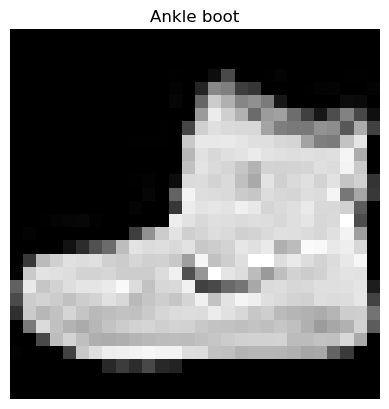

In [11]:
import matplotlib.pyplot as plt
image, labale = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image[0], cmap="gray")
plt.title(class_names[label])
plt.axis(False)

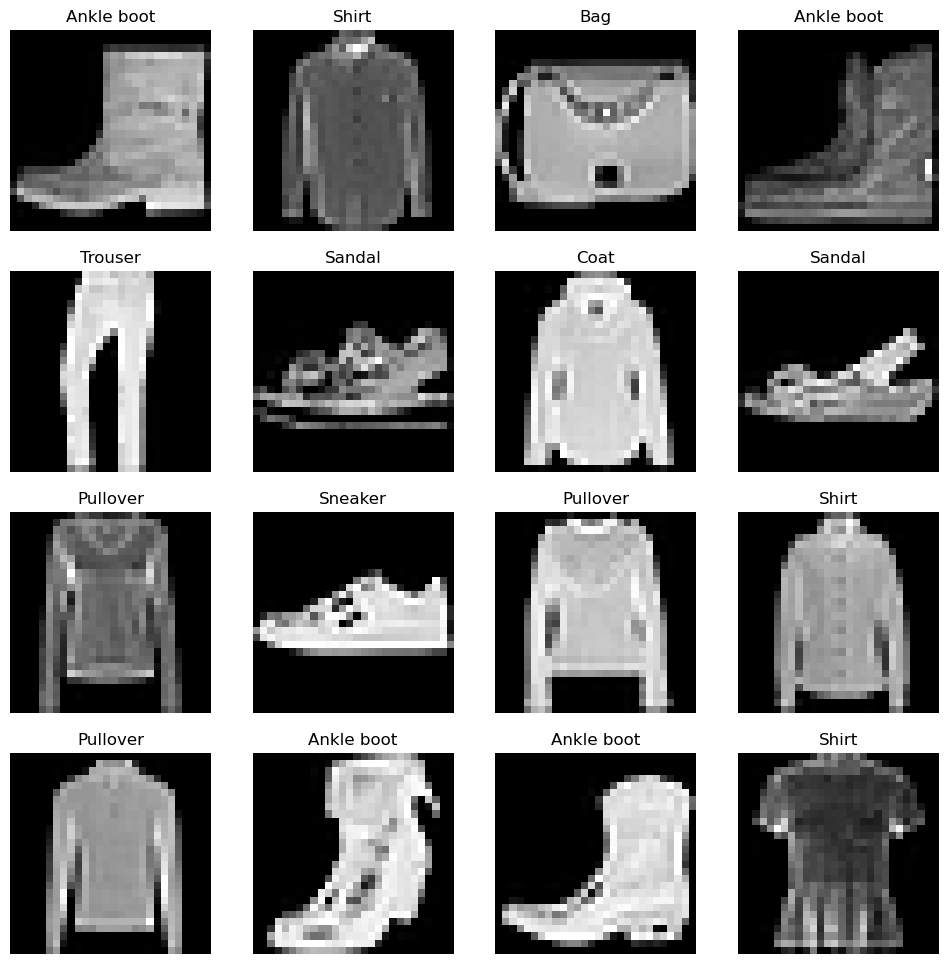

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(12, 12))
rows, cols = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(0), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, the data is in the form of PyTorch Datasets.  
DataLoader turns the dataset into a Python iterable.  
More specifically, we want to turn the data into batches (or mini batches).  
Why?
1. It is more computationally efficient, as in, my computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to eg 32 images at a time (batch size of 32).
2. It gives the NN more chances to update its gradients per epoch.

For more on minibatches look: https://youtu.be/4qJaSmvhxi8?si=D5U-0BwZQwJXKJTw

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size
BATCH_SIZE = 32

# Turn datasets into dataloaders
train_dataloader = DataLoader(
    train_data, 
    batch_size=BATCH_SIZE, 
    shuffle=True,
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1704a790200>,
 <torch.utils.data.dataloader.DataLoader at 0x1704303fce0>)

In [15]:
print(f"DataLoaders: {train_dataloader}, {test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}")

DataLoaders: <torch.utils.data.dataloader.DataLoader object at 0x000001704A790200>, <torch.utils.data.dataloader.DataLoader object at 0x000001704303FCE0>
Length of train dataloader: 1875 batches of size 32
Length of test dataloader: 313 batches of size 32


In [16]:
# Check out what is inside the training dataloader
train_featuers_batch, train_labels_batch = next(iter(train_dataloader))
train_featuers_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


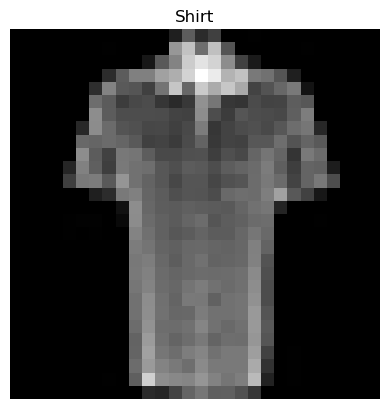

In [17]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_featuers_batch), size=[1]).item()
img, label = train_featuers_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(0), cmap="gray")
plt.title(class_names[label.item()])
plt.axis(False)
print(f"Image shape: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.  
A baseline model is a simple model you will try and improve upon with subsequent models/experiments.  
In other words: Start simply and add complexity when necessary.  

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_featuers_batch[0]

# Flatten the sample
output = flatten_model(x) # Perform forward pass

# Print out what's happening
print(f"Shape of x: {x.shape}")
print(f"Shape of output: {output.shape}")

Shape of x: torch.Size([1, 28, 28])
Shape of output: torch.Size([1, 784])


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(
        self,
        input_shape: int,
        hidden_units: int,
        output_shape: int,
    ):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )    

    def forward(self, x):
        return self.layer_stack(x)


In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names),
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 3.1 Setup loss optimizer and evaluation metrics

* Loss function - Since we're working with multi-class data, the loss function will be `nn.CrossEntropyLoss()`
* Opitimizer - `torch.optim.SGD()`
* Evaluation metric - Since we're working on a classification problem, we'll use accuracy metrics

In [22]:
import requests
from pathlib import Path  

# Download helper function from LearnPyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py exists")
else:
    print("Downloading helper_functions.py ...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as file:
        file.write(request.content)

helper_functions.py exists


In [23]:
# Import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1,)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things one'll often want to track are:
1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [24]:
from timeit import default_timer as timer

def print_train_time(
    start: float,
    end: float,
    device: torch.device = None,
):

    """
    Prints difference between start and end time in a nice format.
    """

    total_time = end - start
    print(f"Train time on {device}: {total_time:.2f} seconds")
    return total_time

### 3.3 Creating a training loop and train a model on batches of data

1. Loop through epochs
2. Loop through batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all

In [26]:
# Import tqdm for a nice progress bar
from tqdm.auto import tqdm

# Set seed
torch.manual_seed(42)

# Start the timer
start = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-------------------------------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. Zero the gradients
        optimizer.zero_grad()
        
        # 4. Backward pass
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()

        # Print info
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)/len(train_dataloader.dataset)*100:.2f}% of training data")
    
    # Divide total train loss by length of train dataloader to get average train loss
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0., 0.
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            # 1. Forward pass
            y_pred = model_0(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(y_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = y_pred.argmax(dim=1))

        # Calculeate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

    # Print out the information
    print(f"Epoch {epoch}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# Calculate total time
end = timer()

total_train_time_model_0 = print_train_time(
    start=start, 
    end=end, 
    device=device)

c:\Users\gutsc\anaconda3\envs\torch_py_3_12_GPU\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------
Looked at 0.00% of training data
Looked at 21.33% of training data
Looked at 42.67% of training data
Looked at 64.00% of training data
Looked at 85.33% of training data


 33%|███▎      | 1/3 [00:25<00:51, 25.63s/it]

Epoch 0, Train loss: 0.5904, Test loss: 0.5095, Test accuracy: 82.0387
Epoch 1
-------------------------------
Looked at 0.00% of training data
Looked at 21.33% of training data
Looked at 42.67% of training data
Looked at 64.00% of training data
Looked at 85.33% of training data


 67%|██████▋   | 2/3 [00:50<00:25, 25.37s/it]

Epoch 1, Train loss: 0.4763, Test loss: 0.4799, Test accuracy: 83.1969
Epoch 2
-------------------------------
Looked at 0.00% of training data
Looked at 21.33% of training data
Looked at 42.67% of training data
Looked at 64.00% of training data
Looked at 85.33% of training data


100%|██████████| 3/3 [01:16<00:00, 25.36s/it]

Epoch 2, Train loss: 0.4550, Test loss: 0.4766, Test accuracy: 83.4265
Train time on cuda: 76.10 seconds


## 4. Make predictions and get model_0 results

In [27]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    dataloader: torch.utils.data.dataloader.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn
):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate loss per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale the loss to find average loss/acccuracy per batch
        loss /= len(dataloader)
        acc /= len(dataloader)

    return {
        "model_name": model.__class__.__name__, #- only works if model has a __class__ attribute, which means it was created with a class
        "loss": loss.item(), 
        "accuracy": acc
    }




In [28]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(
    model=model_0,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

model_0_results

100%|██████████| 313/313 [00:03<00:00, 101.64it/s]


{'model_name': 'FashionMNISTModelV0',
 'loss': 0.47663894295692444,
 'accuracy': 83.42651757188499}

## 5. Setup device agnostic code

Set it up for the last model.

In [29]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6 Building a model with a better non-linearity

We learned about the power of non-linearity before. 

In [30]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
        input_shape: int,
        hidden_units: int,
        output_shape: int,):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )    

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [31]:
# Create model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=28*28, 
    hidden_units=100, 
    output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loop

Let's create a function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [33]:
def train_step(
    model: torch.nn.Module, 
    data_loader: torch.utils.data.DataLoader, 
    loss_fn: torch.nn.Module, 
    optimizer: torch.optim.Optimizer, 
    accuracy_fn,
    device: torch.device = device):
    
    """
    Performs a training with model trying to learn on data_loader.
    """
    
    train_loss, train_acc = 0., 0.

    model.train()

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
        
        # 3. Zero the gradients
        optimizer.zero_grad()
        
        # 4. Backward pass
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
    
    # Divide total train loss by length of train dataloader to get average train loss
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)  
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.2f}%")

In [34]:
def test_step(
    model: torch.nn.Module, 
    data_loader: torch.utils.data.DataLoader, 
    loss_fn: torch.nn.Module, 
    accuracy_fn,
    device: torch.device = device):
    
    """
    Performs a testing with model trying to learn on data_loader.
    """
    
    test_loss, test_acc = 0., 0.

    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

        # Adjust the metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f}%")

In [35]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_1 = timer()

# Set the number of epochs
epochs = 3

# Create an optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-------------------------------")
    train_step(
        model=model_1, 
        data_loader=train_dataloader, 
        loss_fn=loss_fn, 
        optimizer=optimizer, 
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_1, 
        data_loader=test_dataloader, 
        loss_fn=loss_fn, 
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_1= timer()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------
Train loss: 1.1972, Train accuracy: 56.84%


 33%|███▎      | 1/3 [00:26<00:53, 26.56s/it]

Test loss: 0.9228, Test accuracy: 64.84%
Epoch 1
-------------------------------
Train loss: 0.8607, Train accuracy: 66.63%


 67%|██████▋   | 2/3 [00:53<00:26, 26.55s/it]

Test loss: 0.8698, Test accuracy: 67.38%
Epoch 2
-------------------------------
Train loss: 0.4472, Train accuracy: 83.86%


100%|██████████| 3/3 [01:19<00:00, 26.55s/it]

Test loss: 0.4014, Test accuracy: 85.61%


In [36]:
total_train_time_model_1 = print_train_time(
    start=train_time_start_model_1, 
    end=train_time_end_model_1, 
    device=device)

Train time on cuda: 79.66 seconds


> **Note**: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> That's because:
> 1. It could be that overhead for copying data/model to and from the GPU outweights the comute benefits offered by the GPU.
> 2. The hardware one is using has a better CPU in terms of compute capability than the GPU.
>
> For more on how to compute models faster, see here: https://horace.io/brrr_intro.html

In [37]:
# Get model_1 results dictionary
model_1_results = eval_model(
    model=model_1,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

100%|██████████| 313/313 [00:03<00:00, 98.83it/s] 


In [38]:
model_0_results, model_1_results

({'model_name': 'FashionMNISTModelV0',
  'loss': 0.47663894295692444,
  'accuracy': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'loss': 0.4014452397823334,
  'accuracy': 85.61301916932908})

## 7. Model 2: Building a Convolutional Neural Network (CNN)
CNNs are also known as ConvNets. 

CNNs are known for their capabilities to find patterns in visual data.

In [39]:
# Create a convolutinal neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architcture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, 
        input_shape: int, 
        hidden_units: int, 
        output_shape: int
    ):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape, 
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f"Output Shape Conv block 1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output Shape Conv block 2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output Shape Classifier: {x.shape}")
        return x 

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names),
).to(device)

In [41]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28)).to(device)
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [42]:
# Pass image through model
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

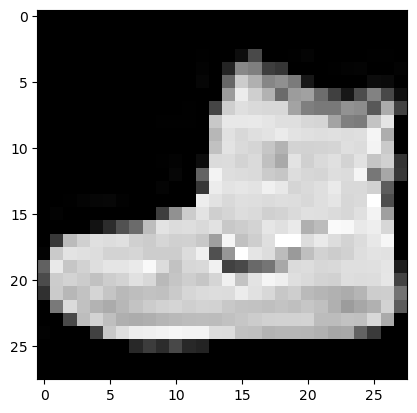

In [43]:
plt.imshow(image.squeeze(0), cmap="gray")

### 7.1 Stepping through `nn.Conv2d`

See the documentation for `nn.Conv2d()` here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


In [44]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [45]:
torch.manual_seed(42)

# Create a singele conv2d layer 
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3, # 3x3 filter, one could also use (3, 3), which is basically the same
    stride=1,
    padding=0,
)

# Pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`
Documentation: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#maxpool2d

In [46]:
# Print out the original image shape without unsqueeze
print(f"Original image shape: {test_image.shape}")
print(f"Unsqueezed image shape: {test_image.unsqueeze(0).shape}")

# Create a maxpool2d layer
maxpool_layer = nn.MaxPool2d(
    kernel_size=2,
)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Conv output shape: {test_image_through_conv.shape}")

# Pass the conv output through the maxpool layer
test_image_through_conv_and_maxpool = maxpool_layer(test_image_through_conv)
print(f"Maxpool output shape: {test_image_through_conv_and_maxpool.shape}")

Original image shape: torch.Size([3, 64, 64])
Unsqueezed image shape: torch.Size([1, 3, 64, 64])
Conv output shape: torch.Size([1, 10, 62, 62])
Maxpool output shape: torch.Size([1, 10, 31, 31])


In [47]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images (CNN Explainer Example)
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor: {random_tensor}")
print(f"random_tensor shape: {random_tensor.shape}")

# Create a maxpool2d layer with a kernel size of 2
maxpool_layer = nn.MaxPool2d(
    kernel_size=2,
)
max_pool_tensor = maxpool_layer(random_tensor)
print(f"Max Pool Tensor: {max_pool_tensor}")
print(f"Max Pool Tensor shape after maxpool: {max_pool_tensor.shape}")

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random_tensor shape: torch.Size([1, 1, 2, 2])
Max Pool Tensor: tensor([[[[0.3367]]]])
Max Pool Tensor shape after maxpool: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [48]:
# Setup loss function / eval metrics / optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and Testing `model_2` using our training and test functions

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3 
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-------------------------------")
    train_step(
        model=model_2, 
        data_loader=train_dataloader, 
        loss_fn=loss_fn, 
        optimizer=optimizer, 
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_2, 
        data_loader=test_dataloader, 
        loss_fn=loss_fn, 
        accuracy_fn=accuracy_fn,
        device=device
    )

# Measure time
train_time_end_model_2 = timer()


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-------------------------------
Train loss: 0.6066, Train accuracy: 78.12%


 33%|███▎      | 1/3 [00:33<01:07, 33.57s/it]

Test loss: 0.4094, Test accuracy: 85.73%
Epoch 1
-------------------------------
Train loss: 0.3639, Train accuracy: 86.90%


 67%|██████▋   | 2/3 [01:06<00:33, 33.11s/it]

Test loss: 0.3590, Test accuracy: 87.12%
Epoch 2
-------------------------------
Train loss: 0.3266, Train accuracy: 88.23%


100%|██████████| 3/3 [01:40<00:00, 33.43s/it]

Test loss: 0.3310, Test accuracy: 87.97%


In [50]:
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2, 
    end=train_time_end_model_2, 
    device=device)

Train time on cuda: 100.29 seconds


In [51]:
# Get the results dictionary
model_2_results = eval_model(
    model=model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

100%|██████████| 313/313 [00:03<00:00, 91.04it/s]


In [52]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.3309790790081024,
 'accuracy': 87.96924920127796}

## 8. Compare model results and training time


In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,loss,accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.401445,85.613019
2,FashionMNISTModelV2,0.330979,87.969249


In [55]:
# Add training times to results comparison
compare_results["train_time"] = [
    total_train_time_model_0, 
    total_train_time_model_1, 
    total_train_time_model_2]
compare_results

,model_name,loss,accuracy,train_time
0,FashionMNISTModelV0,0.476639,83.426518,76.101732
1,FashionMNISTModelV1,0.401445,85.613019,79.664494
2,FashionMNISTModelV2,0.330979,87.969249,100.285164


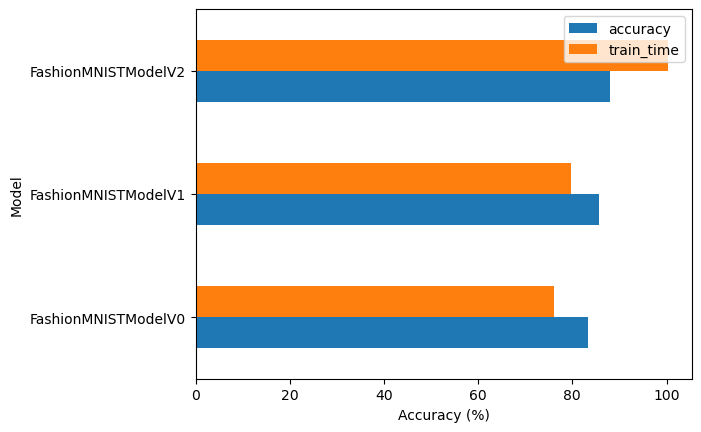

In [56]:
# Visualize the results
compare_results.set_index("model_name")[["accuracy", "train_time"]].plot(
    kind="barh")
plt.xlabel("Accuracy (%)"),
plt.ylabel("Model"),
title="Model comparison on FashionMNIST dataset"


## 9. Make and evaluate random predictions with best model

In [57]:
def make_predictions(
    model: torch.nn.Module, 
    data: list,
    device: torch.device = device):

    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, 0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # Get prediction probabilities (logit -> prediction probabilities)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            
            # Get pred probs off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack pred probs to turn list into a tensor
    result = torch.stack(pred_probs)
    return result

In [58]:
import random

random.seed(424242)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

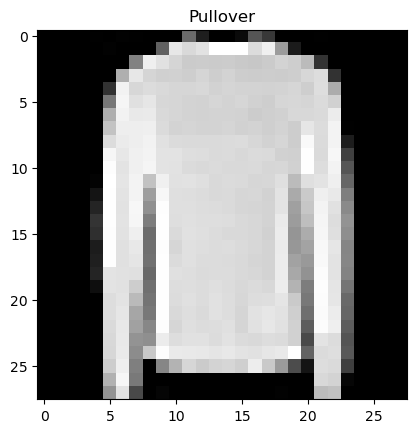

In [59]:
plt.imshow(test_samples[0].squeeze(0), cmap="gray")
plt.title(class_names[test_labels[0]])

In [60]:
# Make predictions

pred_probs = make_predictions(
    model=model_2,
    data=test_samples,
)

In [61]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes[:9]

tensor([2, 6, 3, 7, 8, 6, 0, 6, 4])

In [62]:
print(test_labels[:9])
print(pred_classes[:9])

[2, 6, 3, 7, 8, 6, 0, 3, 2]
tensor([2, 6, 3, 7, 8, 6, 0, 6, 4])


In [63]:
# Convert prediction probabilities to class labels
pred_labels = [class_names[torch.argmax(pred).item()] for pred in pred_probs]
pred_labels[:9]

['Pullover',
 'Shirt',
 'Dress',
 'Sneaker',
 'Bag',
 'Shirt',
 'T-shirt/top',
 'Shirt',
 'Coat']

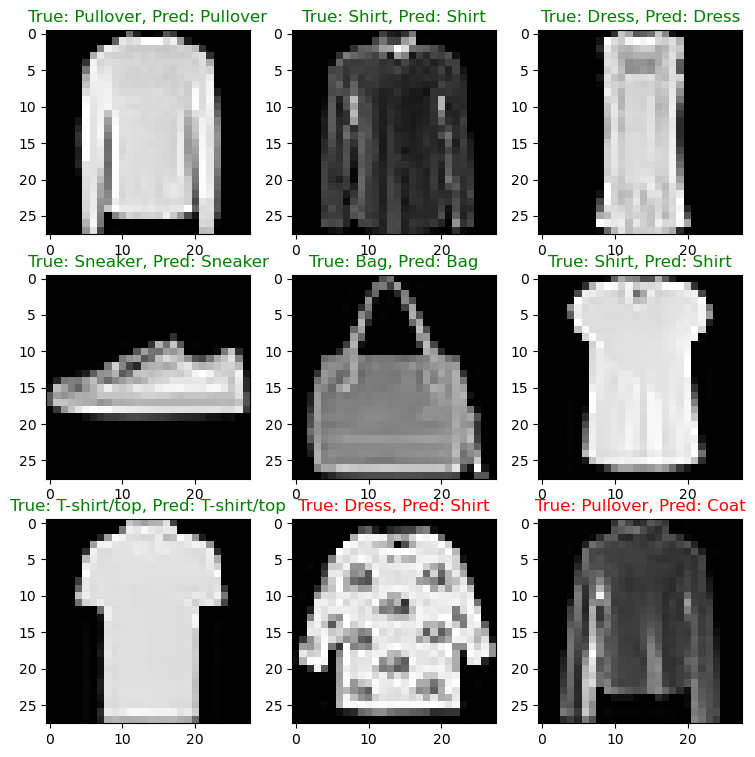

In [64]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(0), cmap="gray")

    # check for equality and set color
    text_color = "green" if pred_labels[i] == class_names[test_labels[i]] else "red"
    plt.title(f"True: {class_names[test_labels[i]]}, Pred: {pred_labels[i]}", color=text_color)

    

## 10. Confusion Matrix

A confusion matrix is a way of evaluating the classification models visually.

1. Make preds with the trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` 
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix` 

In [65]:
# tqdm
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions"):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())

Making predictions: 100%|██████████| 313/313 [00:03<00:00, 89.46it/s]


In [66]:
# concatenate all predictions
y_pred_tensor = torch.cat(y_preds)
print(y_pred_tensor[:10])
print(len(y_pred_tensor))

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
10000


In [67]:
test_data.targets, y_pred_tensor

(tensor([9, 2, 1,  ..., 8, 1, 5]), tensor([9, 2, 1,  ..., 8, 1, 5]))

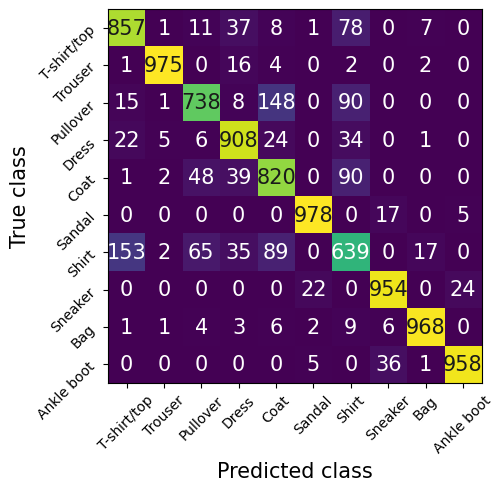

In [69]:
from torchmetrics.classification import MulticlassConfusionMatrix

metric = MulticlassConfusionMatrix(num_classes=len(class_names))
metric.update(y_pred_tensor, test_data.targets)
fig, ax = metric.plot()
ax.set_xticklabels(class_names, rotation=45);
ax.set_yticklabels(class_names, rotation=45);

## 11. Save and load best performing model

In [70]:
from pathlib import Path

# Create a directory to save the model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(
    exist_ok=True,
    parents=True,
)

# Creat model name
MODEL_NAME = "03_pytorsch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model state dict to: {MODEL_SAVE_PATH}")
torch.save(
    model_2.state_dict(), 
    MODEL_SAVE_PATH
)

Saving model state dict to: models\03_pytorsch_computer_vision_model_2.pth


In [71]:
torch.manual_seed(42)

# Create a new instance of the model
loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names),
).to(device)

# Load the saved model state dict
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)

C:\Users\gutsc\AppData\Local\Temp\ipykernel_2868\3284569796.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [72]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.3309790790081024,
 'accuracy': 87.96924920127796}

In [73]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

loaded_model_2_results

100%|██████████| 313/313 [00:03<00:00, 91.53it/s]


{'model_name': 'FashionMNISTModelV2',
 'loss': 0.3309790790081024,
 'accuracy': 87.96924920127796}

In [74]:
# Compare the loaded model results with the original model results with torch.allclose
torch.allclose(
    torch.tensor(model_2_results["accuracy"]),
    torch.tensor(loaded_model_2_results["accuracy"]),
    atol=1e-2
)

True

## Exercise
- #TODO [Extra Curriculum](https://www.learnpytorch.io/03_pytorch_computer_vision/#extra-curriculum)
- #TODO [Computer Vision Exercises](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)